# Supervised Learning Model Comparison

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Life%20Expectancy%20Data.csv')

#Initial Exploration and Pre-Processing

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df['Country'].nunique()

193

In [7]:
df['Year'].nunique()

16

In [8]:
df['Status'].value_counts()

,count
Status,
Developing,2426
Developed,512


In [9]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [10]:
numerical_cols=df.select_dtypes(include='number').columns
for col in numerical_cols:
  df[col].fillna(df[col].median(),inplace=True)

In [11]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


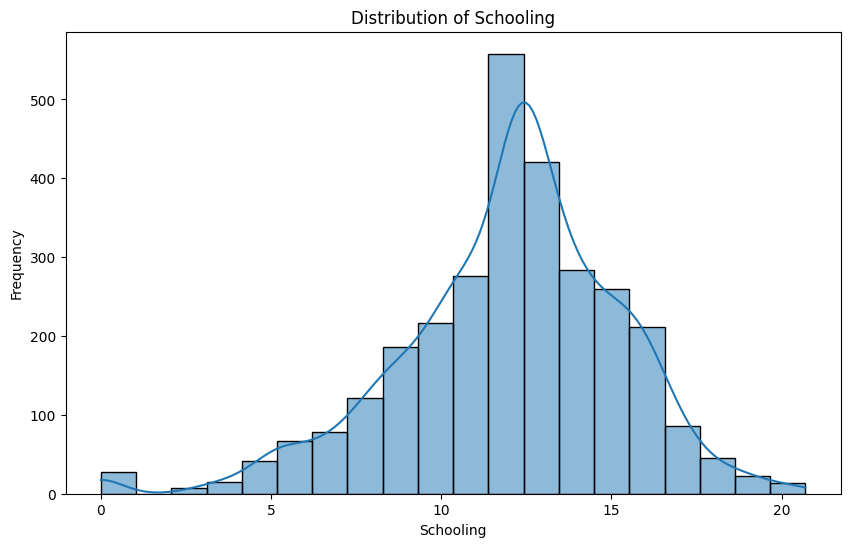

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Schooling'],bins=20,kde=True)
plt.title('Distribution of Schooling')
plt.xlabel('Schooling')
plt.ylabel('Frequency')
plt.show()

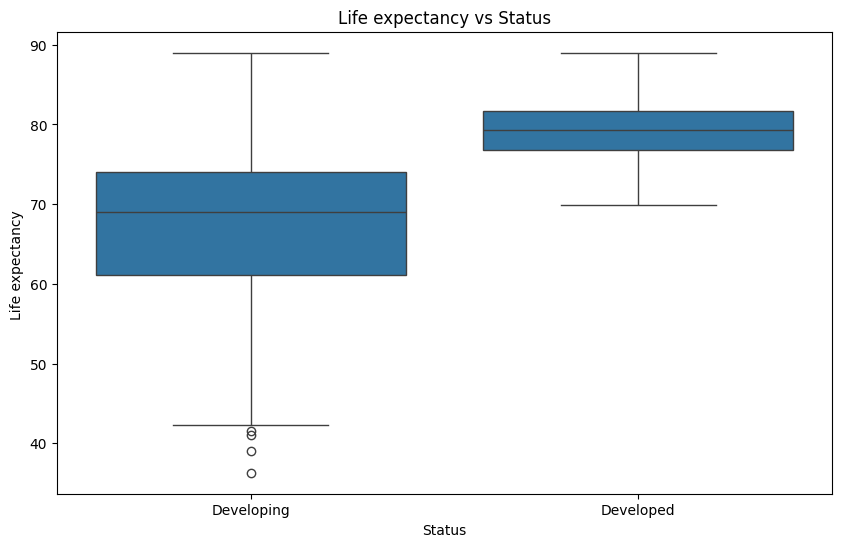

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Status',y='Life expectancy ',data=df)
plt.title('Life expectancy vs Status')
plt.show()

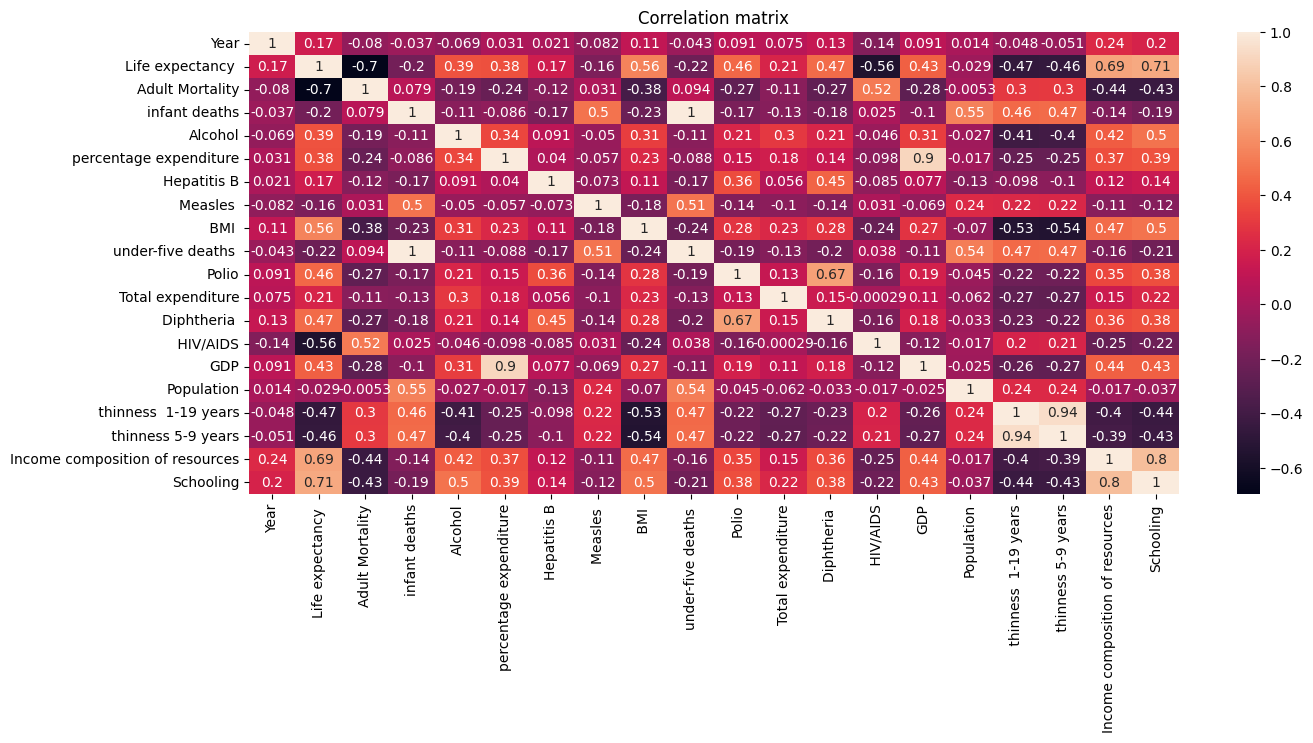

In [16]:
corr=df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

In [17]:
df_encoded=df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object'):
  df_encoded[col] = le.fit_transform(df_encoded[col])
  df=df_encoded


In [18]:
df.head().round()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,0,2014,1,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,0,2013,1,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,0,2012,1,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,0,2011,1,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0


In [19]:
x=df.drop('Status',axis=1)
y=df['Status']

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

print(f'Dataset shape:{df.shape}')
print(f'x_train shape:{x_train.shape}')
print(f'x_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_test shape:{y_test.shape}')


Dataset shape:(2938, 22)
x_train shape:(2350, 21)
x_test shape:(588, 21)
y_train shape:(2350,)
y_test shape:(588,)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.drop(['Country','Year'],axis=1))
x_test_scaled=scaler.transform(x_test.drop(['Country','Year'],axis=1))

print(x_train_scaled)
print(x_test_scaled)

[[-0.48913941  0.45121162  0.03938534 ...  3.04964939 -0.83557121
  -0.84623727]
 [ 0.31216586 -0.26649792 -0.00341293 ...  0.01481782  0.22540388
  -0.05499824]
 [-0.47873285  0.41895501 -0.26020256 ... -1.04175317 -3.08892656
   0.09716312]
 ...
 [ 2.03965516 -0.76647536 -0.26020256 ... -0.929352    1.46645272
   1.61877665]
 [ 0.54111023 -0.12940734 -0.26020256 ...  0.44194227  0.70235598
   0.94926669]
 [-0.71808378  0.65281542  0.270496   ... -0.34486592 -0.84530493
  -1.54617949]]
[[ 0.47867085 -0.32294699 -0.25164291 ...  0.44194227  0.48334736
  -0.17672732]
 [ 0.61395616 -0.32294699 -0.25164291 ... -0.61462873  0.63908683
   0.61451172]
 [-0.06247037  0.29799273 -0.22596394 ... -0.34486592 -0.01793903
   0.03629858]
 ...
 [ 0.42663804 -0.22617716 -0.26020256 ... -0.54718802 -3.08892656
  -3.67643843]
 [-0.32263442 -1.10516975 -0.25164291 ... -0.56966826  0.28380618
   0.67537626]
 [ 0.85330709 -0.78260366 -0.26020256 ...  2.03803887  0.19620273
   0.00586631]]


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


classifiers={'Logistic Regression':LogisticRegression(),
             'K-Nearest Neighbors':KNeighborsClassifier(),
             'Decision Tree':DecisionTreeClassifier(),
             'Random Forest':RandomForestClassifier(),
             'Support Vector Machine':SVC(),
             'Naive Bayes':GaussianNB(),
             'XGBoost':XGBClassifier()}


In [25]:
from sklearn.metrics import accuracy_score,f1_score

results={}

for name,clf in classifiers.items():
  clf.fit(x_train_scaled,y_train)
  y_pred=clf.predict(x_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  results[name]={'Accuracy Score':accuracy,'f1 score':f1}

results_df=pd.DataFrame(results).T
results_df

,Accuracy Score,f1 score
Logistic Regression,0.945578,0.968627
K-Nearest Neighbors,0.960884,0.977340
Decision Tree,0.965986,0.980507
Random Forest,0.989796,0.994129
Support Vector Machine,0.954082,0.973346
Naive Bayes,0.785714,0.859060
XGBoost,0.988095,0.993157


RandomForest and XGBoost models are best performing model because the accuracy score and f1 score of these models are high compare with other models.

In [26]:
x=df.drop('Life expectancy ',axis=1)
y=df['Life expectancy ']

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(f'Dataset shape:{df.shape}')
print(f'x_train shape:{x_train.shape}')
print(f'x_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_test shape:{y_test.shape}')

Dataset shape:(2938, 22)
x_train shape:(2350, 21)
x_test shape:(588, 21)
y_train shape:(2350,)
y_test shape:(588,)


In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.drop(['Country','Year','Status'],axis=1))
x_test_scaled=scaler.transform(x_test.drop(['Country','Year','Status'],axis=1))

print(x_train_scaled)
print(x_test_scaled)

[[-0.31789671 -0.25751384  0.19045798 ...  0.71301184 -0.15670411
  -0.04397277]
 [-0.10996316 -0.25751384 -0.18631128 ...  1.00454928 -0.354789
  -0.32060097]
 [-0.18194016 -0.25751384  1.51043194 ... -0.11674858  0.49202389
   0.2633919 ]
 ...
 [ 0.8017455  -0.1054732   0.39550248 ... -0.13917454 -0.86980971
  -1.1197491 ]
 [-0.74975871 -0.23962671  1.22080659 ... -0.96893495  1.02685309
   1.03180357]
 [-1.0536616  -0.19490887 -0.88858869 ...  1.0494012  -3.13788167
  -2.0418431 ]]
[[-0.34188905 -0.18596531 -0.91421925 ...  0.33177057  0.01166804
  -0.1976551 ]
 [-0.42186349 -0.25751384  1.86925981 ... -0.67739751  0.73963
   0.57075657]
 [-0.32589416 -0.25751384  0.11356629 ... -0.58769368  0.63563544
   0.47854717]
 ...
 [ 0.76975572 -0.23068314 -0.20040809 ...  0.53360418 -0.90942668
  -0.96606677]
 [ 0.17794484 -0.25751384  0.464705   ...  0.39904844  0.58116209
   0.0789731 ]
 [-0.26991205 -0.24857028  1.28231994 ... -0.54284177  0.57125785
   0.4478107 ]]


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

classifiers={'Linear Regression':LinearRegression(),
             'K-Neighbors Regressor':KNeighborsRegressor(),
             'Decision Tree Regressor':DecisionTreeRegressor(),
             'Random Forest Regressor':RandomForestRegressor(),
             'Support Vector Regressor':SVR()}

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error

results={}

for name,clf in classifiers.items():
  clf.fit(x_train_scaled,y_train)
  y_pred=clf.predict(x_test_scaled)
  r2=r2_score(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  results[name]={'R2 Score':r2,'MAE':mae}

results_df=pd.DataFrame(results).T
results_df

,R2 Score,MAE
Linear Regression,0.822111,2.859304
K-Neighbors Regressor,0.921709,1.849286
Decision Tree Regressor,0.917295,1.600170
Random Forest Regressor,0.967263,1.092682
Support Vector Regressor,0.871332,2.311620


Random Forest Regression is the best performimg model with highest r2 score(0.96)and lowest MAE(1.11) compare with other models.



# Unsupervised Learning – k-Means

Customer Segmentation

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


k-Means Clustering Steps

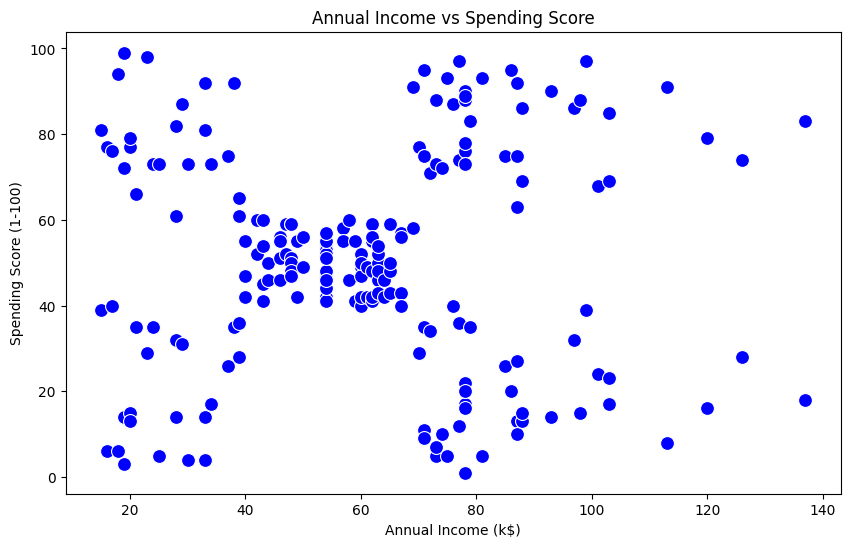

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',color= 'blue',s=100)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [41]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [43]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=5)
cluster_labels= kmeans.fit_predict(x)

In [44]:
wcss=[]

k_values=range(1,11)

for K in k_values:
  kmeans=KMeans(n_clusters=K)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [45]:
wcss

[269981.28000000014,
 183811.2827701642,
 106348.37306211119,
 73679.78903948837,
 44454.47647967972,
 38813.772331834836,
 30259.657207285458,
 25062.433792653766,
 26668.01941860322,
 21842.014330458518]

Plot the Elbow Chart:

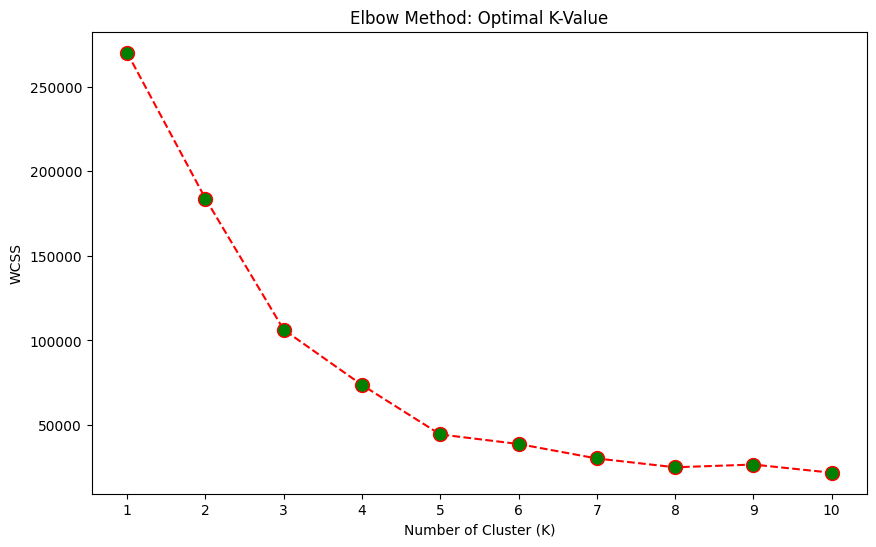

In [47]:
plt.figure(figsize=(10,6))
plt.plot(k_values,wcss,marker='o',linestyle='--',markersize=10,color='red',markerfacecolor='green')
plt.title('Elbow Method: Optimal K-Value')
plt.xticks(k_values)
plt.xlabel('Number of Cluster (K)')
plt.ylabel('WCSS')
plt.show()

In [48]:
K=5
kmeans= KMeans(n_clusters=K)
df['cluster']= kmeans.fit_predict(x)
df.head().round()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [50]:
centroids= kmeans.cluster_centers_
centroids

array([[55.0875    , 49.7125    ],
       [86.53846154, 82.12820513],
       [87.75      , 17.58333333],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

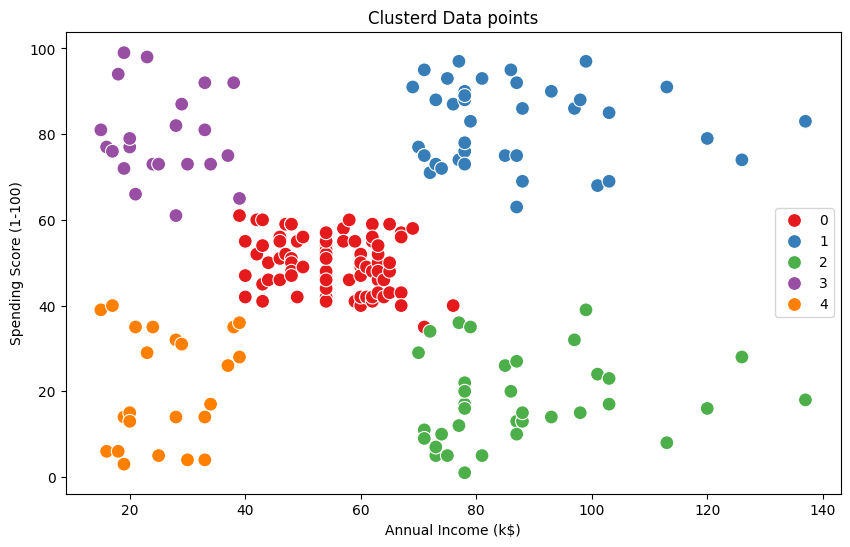

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',palette='Set1',s=100)
plt.title('Clusterd Data points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()